In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [26]:
# load the dataset
column_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4','class']
feat_list = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
df = pd.read_csv('eyedata.csv',header=None)
df.columns=column_list
data= df

In [27]:
print("dimension of data: {}".format(data.shape))

dimension of data: (14980, 15)


In [28]:
print("{:7}\t{:5}\t{:5}\t{:5}\t{:5}\t{:5}\t{:5}".format("Channel", "min", "mean", "max", "min", "mean", "max"))
x_cols =  ["AF3", "F7", "F3", "FC5", "T7", "P7", "O1", "O2", "P8", "T8", "FC6", "F4", "F8", "AF4"]
for x in x_cols: 
    print("{:6}\t{:5.0f}\t{:5.0f}\t{:5.0f}\t{:5.0f}\t{:5.0f}\t{:5.0f}".format(x, data[data['class']==1][x].min(), data[data['class']==1][x].mean(), data[data['class']==1][x].max(), data[data['class']==0][x].min(), data[data['class']==0][x].mean(), data[data['class']==0][x].max()))

Channel	min  	mean 	max  	min  	mean 	max  
AF3   	 4199	 4351	309231	 1031	 4298	 7398
F7    	 3906	 4006	 5501	 2831	 4013	 7805
F3    	 4212	 4266	 6881	 1040	 4262	 5763
FC5   	 4058	 4121	 5416	 2453	 4200	642564
T7    	 4310	 4342	 5455	 2090	 4342	 6474
P7    	 4002	 4619	 4709	 2768	 4665	362564
O1    	 2086	 4074	 4167	 3582	 4140	567179
O2    	 4568	 4617	 4770	 4567	 4615	 7264
P8    	 4148	 4241	265641	 1358	 4200	 7144
T8    	 3915	 4233	 4323	 1816	 4230	 6674
FC6   	 4131	 4205	 6823	 3273	 4200	 6138
F4    	 2258	 4281	 4369	 3091	 4277	 7003
F8    	 4510	 4633	152308	   87	 4601	 4834
AF4   	 4246	 4367	 5023	 1366	 4457	715897


In [29]:

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'class'], data['class'], stratify=data['class'], random_state=66)

In [30]:
X_train.shape, X_test.shape

((11235, 14), (3745, 14))

In [31]:
#Linear Discriminant Analysis (LDA)

In [32]:
ldam=LinearDiscriminantAnalysis()
ldam.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(ldam.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(ldam.score(X_test, y_test)))

Accuracy on training set: 0.64
Accuracy on test set: 0.64


In [33]:
#Quadratic Discriminant Analysis (QDA)

In [34]:
qdam=QuadraticDiscriminantAnalysis()
qdam.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(qdam.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(qdam.score(X_test, y_test)))

Accuracy on training set: 0.50
Accuracy on test set: 0.50


In [35]:
#Support Vector Machine (SVM) rbf  

In [36]:
svc = SVC(kernel='rbf',C=1, decision_function_shape='ovo')
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.55
Accuracy on test set: 0.55


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Precision  0.00
Recall 0.00


<Figure size 432x288 with 0 Axes>

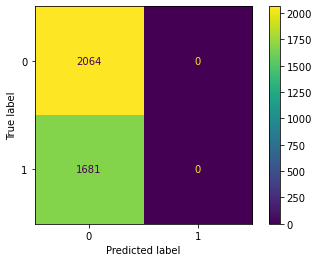

In [37]:
prediction=svc.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(svc, X_test, y_test)
plt.show()

In [38]:
svc = SVC(kernel='poly',degree=3,C=1, decision_function_shape='ovo')
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.55
Accuracy on test set: 0.55


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Precision  0.00
Recall 0.00


<Figure size 432x288 with 0 Axes>

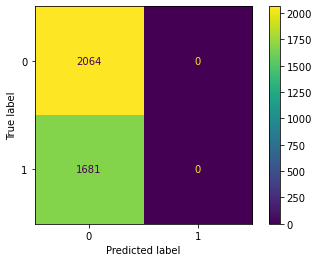

In [39]:
prediction=svc.predict(X_test)
cmatrix=confusion_matrix(y_test,prediction)
print("Precision  {:.2f}".format(precision_score(y_test,prediction, average='binary')))
print("Recall {:.2f}".format(recall_score(y_test,prediction, labels=[-1,1], average='micro')))
plt.figure()
plot_confusion_matrix(svc, X_test, y_test)
plt.show()